In [21]:
#Install openCV library
!pip install opencv-python
!pip install opencv-contrib-python

In [22]:
#Import openCV and pytesseract libraries
import cv2
import pytesseract
import numpy as np 
import matplotlib.pyplot as plt
import os
from PIL import Image


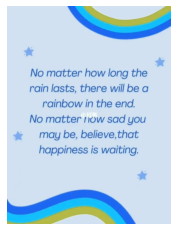

In [23]:
image_path = 'C:/Users/Administrator/Desktop/Homework/cv/text10.jpg'    
image = cv2.imread(image_path)  

plt.imshow(image)
plt.axis('off')
plt.show()

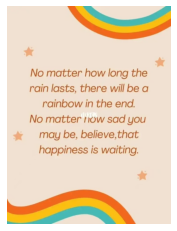

In [24]:
image_path = 'C:/Users/Administrator/Desktop/Homework/cv/text10.jpg'    
image = cv2.imread(image_path)  

# Convert BGR image to RGB image
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.axis('off')
plt.show()

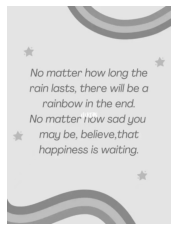

In [25]:
#Adjust image to grayscale
gray_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image_rgb_gray = cv2.cvtColor(gray_img, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb_gray)
plt.axis('off')
plt.show()

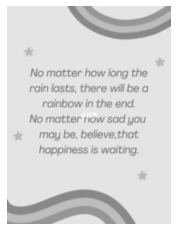

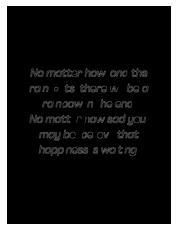

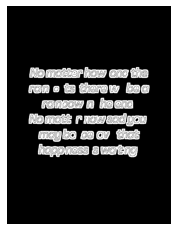

In [26]:
# Perform image Gaussian blur processing
 #(9, 9) is the size of the Gaussian kernel, and 0 means that the standard deviation is automatically calculated based on the kernel size.
blurred_image = cv2.GaussianBlur(image_rgb_gray, (9, 9), 0)

plt.imshow(blurred_image)
plt.axis('off')
plt.show()


# Perform image edge detection (Canny edge detection)
 
edges = cv2.Canny(blurred_image, 10, 250)

plt.imshow(edges, cmap='gray')  
plt.axis('off')
plt.show()

#Apply adaptive threshold processing
thresholded_image_1 = cv2.adaptiveThreshold(edges, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2) 
thresholded_image_2 = cv2.cvtColor(thresholded_image_1, cv2.COLOR_BGR2RGB)
plt.imshow(thresholded_image_2)  
plt.axis('off')
plt.show()


In [8]:
#Contour detection
contours, _ = cv2.findContours(thresholded_image_1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [27]:
# Traverse the contour and draw a bounding box
for contour in contours:   
    if cv2.contourArea(contour) < 500:  
        continue  
  
    # Get bounding box 
    x, y, w, h = cv2.boundingRect(contour)  
      
    # Draw a bounding box 
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

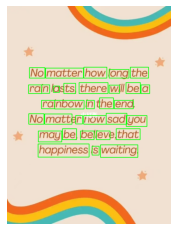

In [28]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [29]:
# Configure Tesseract OCR path and parameters
tesseract_path = 'C:/Users/Administrator/Desktop/Homework/cv/tesseract/tesseract.exe'
pytesseract.pytesseract.tesseract_cmd = tesseract_path
config = r'--oem 3 --psm 6'

# Extract text from images using Tesseract OCR
detected_text = pytesseract.image_to_string(image_rgb_gray, config=config, lang='eng')

# Print detected text
print("Detected Text:")  
print(detected_text)


Detected Text:
No matter how long the 7
rain lasts, there will be a
rainbow in the end.
No matter now sad you
# may be, believe,that
happiness is waiting.
~N

